Importing

In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings('ignore')

MAIN_DIR = "D:\\College_Semesters\\6th Semester\\C. Deep Learning for Signal & Image Processing\\Project_New\\Dataset"
SEED = 40
os.listdir(MAIN_DIR)

['ai',
 'cha',
 'ee',
 'ka',
 'la',
 'ma',
 'moo',
 'nna',
 'nnna',
 'nu',
 'nuu',
 'oo',
 'pa',
 'ra',
 't',
 'tha',
 'va',
 'vee',
 'vu',
 'y',
 'ya']

In [6]:
def load_images(folder):
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                if img.shape[-1] == 1:
                    # convert grayscale image to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                img = cv2.resize(img,(224,224))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [7]:
data, labels = load_images(MAIN_DIR)

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(labels)
y = encoder.transform(labels)

y_one_hot = to_categorical(y, num_classes=21) # One-hot encode the target variable

norm_data = data / 255. 
norm_data.shape, norm_data[0]

((2698, 224, 224, 3),
 array([[[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.4       , 0.50588235],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        ...,
 
        [[0.16470588, 0.36862745, 0.48627451],
         [0.1647058

In [9]:
# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Train Data Shape:", train_data.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Data Shape:", test_data.shape)
print("Test Labels Shape:", test_labels.shape)

Train Data Shape: (2158, 224, 224, 3)
Train Labels Shape: (2158,)
Test Data Shape: (540, 224, 224, 3)
Test Labels Shape: (540,)


In [10]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=21)
test_labels = to_categorical(test_labels, num_classes=21)

In [11]:
from tensorflow.keras.applications import ResNet50
lambda_ = 1e-3
model = keras.Sequential()
core = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=norm_data.shape[1:]
)
for layer in core.layers[:-2]:
    layer.trainable = False
model.add(core)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(21, activation='softmax', kernel_regularizer=keras.regularizers.l2(lambda_)))

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Fit the model
# history = model.fit(norm_data, y_one_hot, epochs=50, validation_split=0.25)
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/50
68/68 [==============================] - 430s 6s/step - loss: 3.4900 - accuracy: 0.8193 - val_loss: 0.8789 - val_accuracy: 0.9407
Epoch 2/50
68/68 [==============================] - 241s 4s/step - loss: 0.3600 - accuracy: 0.9801 - val_loss: 0.8852 - val_accuracy: 0.9500
Epoch 3/50
68/68 [==============================] - 244s 4s/step - loss: 0.3865 - accuracy: 0.9824 - val_loss: 1.8434 - val_accuracy: 0.9204
Epoch 4/50
68/68 [==============================] - 236s 3s/step - loss: 0.4184 - accuracy: 0.9815 - val_loss: 1.1858 - val_accuracy: 0.9519
Epoch 5/50
68/68 [==============================] - 214s 3s/step - loss: 0.2577 - accuracy: 0.9912 - val_loss: 1.1159 - val_accuracy: 0.9556
Epoch 6/50
68/68 [==============================] - 210s 3s/step - loss: 0.2629 - accuracy: 0.9917 - val_loss: 2.0072 - val_accuracy: 0.9333
Epoch 7/50
68/68 [==============================] - 207s 3s/step - loss: 0.2509 - accuracy: 0.9921 - val_loss: 1.3477 - val_accuracy: 0.9519
Epoch 8/50
68

In [12]:
model.save("ResNet_3.h5")

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
tf.keras.models.save_model(model,'ResNet3.hdf5')

In [15]:
# Evaluate the model on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test Loss:', test_loss)

accuracy = np.mean(predicted_labels == true_labels)
print('Accuracy:', accuracy*100)

17/17 [==============================] - 41s 2s/step - loss: 1.1533 - accuracy: 0.9611
Test Loss: 1.153255820274353
Accuracy: 96.11111111111111


In [16]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(true_labels, predicted_labels))

17/17 [==============================] - 40s 2s/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      0.87      0.93        23
           2       1.00      0.92      0.96        52
           3       0.85      1.00      0.92        35
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        33
           6       0.97      0.97      0.97        32
           7       0.96      0.82      0.88        28
           8       0.94      0.94      0.94        17
           9       0.93      1.00      0.96        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        26
          12       0.94      1.00      0.97        17
          13       0.95      1.00      0.98        20
          14       0.87      1.00      0.93        34
          15       1.00      0.87      0.93        15
          16       1.00     

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 21)                2107413   
                                                                 
Total params: 25,695,125
Trainable params: 2,107,413
Non-trainable params: 23,587,712
_________________________________________________________________


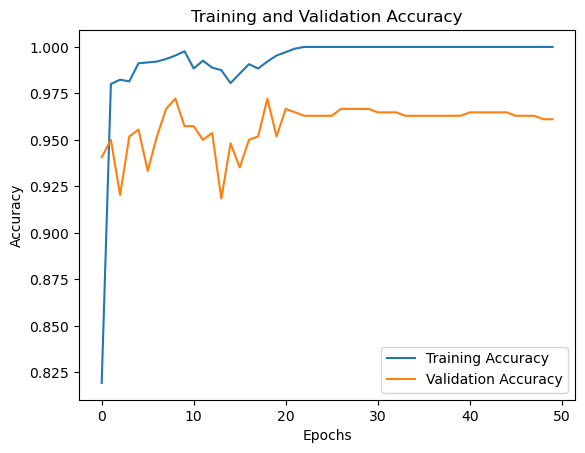

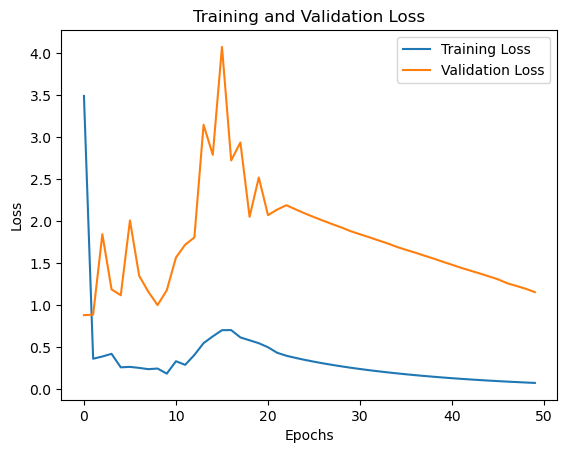

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()